Bq_helper is little tricky to configure in you local machine 
As recommended by Google developer creater of bq_helper api use in kaggle
If you aren't running BigQuery_Helper on Kaggle, you will also need to go through the standard BigQuery client setup and authentication process. : https://github.com/SohierDane/BigQuery_Helper

And below kernel is usefull in understanding Bigquery L:
https://www.kaggle.com/kernels/notebooks/new?forkParentScriptVersionId=4616877&userName=jasbirsinghh

And for understanding Biitcoin:
https://www.kaggle.com/ibadia/bitcoin-101-bitcoins-and-detailed-insights



In [54]:
from google.cloud import bigquery
import pandas as pd
from bq_helper import BigQueryHelper
import numpy as np 
import pandas as pd 

In [55]:
bitcoin = BigQueryHelper("bigquery-public-data","bitcoin_blockchain")

bitcoin.list_tables()

['blocks', 'transactions']

In [56]:
bitcoin.table_schema("blocks")

,name,type,mode,description
0,block_id,STRING,NULLABLE,None
1,previous_block,STRING,NULLABLE,None
2,merkle_root,STRING,NULLABLE,None
3,timestamp,INTEGER,NULLABLE,None
4,difficultyTarget,INTEGER,NULLABLE,None
5,nonce,INTEGER,NULLABLE,None
6,version,INTEGER,NULLABLE,None
7,work_terahash,INTEGER,NULLABLE,None
8,work_error,STRING,NULLABLE,None
9,transactions,RECORD,REPEATED,None


In [57]:
bitcoin.head("blocks")

,block_id,previous_block,merkle_root,timestamp,difficultyTarget,nonce,version,work_terahash,work_error,transactions,row_number
0,00000000000000023c0ce8ac131b6e88952ae3c7a8315c...,0000000000000016db77a6785423f131ce8f1076a6ddc2...,5ecb112c7f54f70a2ccd5b877d4dbd7a478152a5bf9678...,1379999043000,421929506,2110395760,2,4837433,None,[{'transaction_id': '3e17665716fab9b68ba245d57...,1
1,00000000000004e3da9fc74f5f4ec4b7ce928f7237c795...,0000000000000428aee2e347bc11e14fe3c3e0eabb6e61...,0c5bbb087e03eb0aea34c6f50814fa1f32369499d0f1b4...,1318413058000,436858461,3359883262,1,72557,None,[{'transaction_id': '1f06ae6588227bc25cdcd40a9...,1
2,0000000000000000006f129a5293410540436dd4c33e9a...,00000000000000000030aade3b148454a086a69709c7f5...,b671c568e62a9d74695bda2a9e3b80dc1a967dc5f30cb5...,1511339230000,402705995,4155910070,536870912,58602376365,None,[{'transaction_id': 'd94590781f43c5680c37f81f4...,1
3,0000000000000104515562fe3aaaaf89e374c11d8d946d...,0000000000000501c7d65488f150300e28e9a095b41b8d...,0fb6343e8b3e5d6feb12ca9fb53f1afdbfaf3e65b09f96...,1341438514000,436835377,4075555542,1,75225,None,[{'transaction_id': '082385c1b3548fb520cc7ae5a...,1
4,000000003fd3d3b23332f74ad413a6b47eeb55a2ab083f...,0000000055ab62c753cdbac6c20a9644839c727ac4e1f8...,a96212b3b21eca17d9a9126c858084fe830429f9554770...,1259735715000,486604799,2133177088,1,0,None,[{'transaction_id': 'a96212b3b21eca17d9a9126c8...,1


In [58]:
bitcoin.table_schema("transactions")

,name,type,mode,description
0,timestamp,INTEGER,NULLABLE,None
1,transaction_id,STRING,NULLABLE,None
2,inputs,RECORD,REPEATED,None
3,inputs.input_script_bytes,BYTES,NULLABLE,None
4,inputs.input_script_string,STRING,NULLABLE,None
5,inputs.input_script_string_error,STRING,NULLABLE,None
6,inputs.input_sequence_number,INTEGER,NULLABLE,None
7,inputs.input_pubkey_base58,STRING,NULLABLE,None
8,inputs.input_pubkey_base58_error,STRING,NULLABLE,None
9,outputs,RECORD,REPEATED,None


In [59]:
bitcoin.head("transactions").transaction_id

0    a46239d5681d3d040d4771713908836f69c83c17e2665d...
1    25ebfaa771e1c56fb65d9361fc74fe42f41e53114ef437...
2    c2e645a833af94b6c1d94b4762cb7e1b2922d9b4a9bedf...
3    7818d98a408e7892c0bc9b2aa8aa70a299694ca708984a...
4    ddb4fce643f56542af197580ea632616a71631f18b01a6...
Name: transaction_id, dtype: object

In [60]:
bitcoin.head("transactions")


,timestamp,transaction_id,inputs,outputs,block_id,previous_block,merkle_root,nonce,version,work_terahash,work_error
0,1517764797000,a46239d5681d3d040d4771713908836f69c83c17e2665d...,[{'input_script_bytes': b'H0E\x02!\x00\xfc\x1c...,"[{'output_satoshis': 1175222, 'output_script_b...",000000000000000000137be6779ed2c6e8a087d75ce9a9...,00000000000000000015e8904b1a5cfca6cee783542238...,a79b608a4e3627fba2e913bc963e79935fe4652231a63a...,3812720024,536870912,111803024712,None
1,1534798559000,25ebfaa771e1c56fb65d9361fc74fe42f41e53114ef437...,[{'input_script_bytes': b'\x16\x00\x14\\}\xb8\...,"[{'output_satoshis': 1515514, 'output_script_b...",0000000000000000001aca6d8cce0496fdd9397f4dae70...,00000000000000000021cb65a65af9c37232c2019d1e72...,3293387c30b197789a220cb2ce374372ba603e29e86223...,1104288278,536928256,274423257951,None
2,1513168148000,c2e645a833af94b6c1d94b4762cb7e1b2922d9b4a9bedf...,[{'input_script_bytes': b'H0E\x02!\x00\x9b\xb8...,"[{'output_satoshis': 1963578, 'output_script_b...",00000000000000000001b85b9a0ce8a9799cb30ec0bd8d...,0000000000000000009ffae6dfaec04cfc6547336c3f7c...,41d26a3cffa9752eca413be2fb3d55e5f3cc2352e9590d...,159740301,536870912,68329545364,None
3,1452878642000,7818d98a408e7892c0bc9b2aa8aa70a299694ca708984a...,[{'input_script_bytes': b'G0D\x02 k\x18NT\xbdd...,"[{'output_satoshis': 46187500, 'output_script_...",0000000000000000082599be00bde6aca271d20c771542...,000000000000000002edbd1252e84813b7e7996a08612e...,18489140584f9cb48b7bb0dfe0954f2180c3ccb419144b...,1120391436,4,4868604394,None
4,1529191551000,ddb4fce643f56542af197580ea632616a71631f18b01a6...,[{'input_script_bytes': b'\x16\x00\x14\x06\x8d...,"[{'output_satoshis': 1545610, 'output_script_b...",00000000000000000014a84aa67ccdd5999ffdc263e601...,00000000000000000028b621fe8a8734b80d930017eb67...,7b83a1195a50d0c82c5f236de4fb63c23db5569bae3707...,927446550,536870912,212204897014,None


In [61]:
bitcoin.table_schema("transactions")

,name,type,mode,description
0,timestamp,INTEGER,NULLABLE,None
1,transaction_id,STRING,NULLABLE,None
2,inputs,RECORD,REPEATED,None
3,inputs.input_script_bytes,BYTES,NULLABLE,None
4,inputs.input_script_string,STRING,NULLABLE,None
5,inputs.input_script_string_error,STRING,NULLABLE,None
6,inputs.input_sequence_number,INTEGER,NULLABLE,None
7,inputs.input_pubkey_base58,STRING,NULLABLE,None
8,inputs.input_pubkey_base58_error,STRING,NULLABLE,None
9,outputs,RECORD,REPEATED,None


Top 10 blocks with maximum number of transactions using ARRAY_LENGTH function to get count of elemnst stored as array
, Plot the result 

In [62]:
from google.cloud import bigquery
import pandas as pd

client = bigquery.Client()

query = """
#standardSQL
  SELECT
    ARRAY_LENGTH(transactions) NoOfTrans,
    block_id 
  FROM
    `bigquery-public-data.bitcoin_blockchain.blocks`
ORDER BY
  NoOfTrans desc
LIMIT 10
"""
query_job = client.query(query)

iterator = query_job.result(timeout=30)
rows = list(iterator)

# Transform the rows into a nice pandas dataframe
result = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))

# Look at the first 10 headlines
result.columns

Index(['NoOfTrans', 'block_id'], dtype='object')

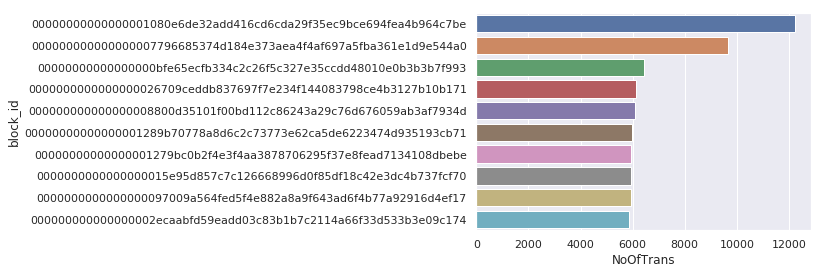

In [63]:
import seaborn as sns; 
import matplotlib.pyplot as plt
sns.set()
sns.barplot(x="NoOfTrans", y="block_id", data=result)
plt.show()

Dates on which there was maximum transactions made using bitcoin 
**Maximum number of transaction were perfromed on 2017-12-214**

In [64]:


from google.cloud import bigquery
import pandas as pd

client = bigquery.Client()

query = """
#standardSQL
SELECT
  o.day,
  COUNT(o.transaction_id) AS NoOfTrans
FROM (
  SELECT
    TIMESTAMP_MILLIS((timestamp - MOD(timestamp,
          86400000))) AS day,
    transaction_id
  FROM
    `bigquery-public-data.bitcoin_blockchain.transactions` ) AS o
GROUP BY
  day
ORDER BY
NoOfTrans desc
"""
query_job = client.query(query)

iterator = query_job.result(timeout=30)
rows = list(iterator)

# Transform the rows into a nice pandas dataframe
result2 = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))

# Look at the first 10 headlines
result2.head()


,day,NoOfTrans
0,2017-12-14 00:00:00+00:00,490644
1,2017-12-06 00:00:00+00:00,443587
2,2018-01-04 00:00:00+00:00,425008
3,2017-12-13 00:00:00+00:00,424579
4,2017-12-01 00:00:00+00:00,412908


Let plot the result from the last query & see how bitcoin has been used from the begining
Not very informative because of the Day column 

In [ ]:
sns.jointplot(x="day",y="NoOfTrans", data=result2,kind="kde", color="m");


Bitcoin usage over the years has been on rise

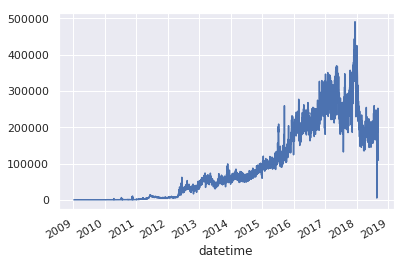

In [65]:
type(result2['day'][0])

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

result2['datetime'] = pd.to_datetime(result2['day'],format="%d.%m.%Y %H:%M:%S.%f")
result2.set_index('datetime', inplace=True)

x = result2['NoOfTrans'].plot()

ticklabels = result2.index.strftime('%Y-%m-%d')
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.show()
